In [1]:
# https://www.kaggle.com/competitions/kuzushiji-recognition/data
import numpy as np
import os 
import cv2 

In [31]:
# Defining CONST
DIR = "/home/harris/Projects/AI-Stuff/Data/Kuzushiji-Recognition/"

In [3]:
# Attempt 1
def segment_image_using_contours(path, file):
    # Read the image
    img = cv2.imread(DIR + path + file, cv2.IMREAD_GRAYSCALE)
    
    # Adaptive thresholding
    binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    
    # Morphological Operations
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    dilated_img = cv2.dilate(binary_img, kernel, iterations=1)
    processed_img = cv2.erode(dilated_img, kernel, iterations=1)
    
    # Find contours
    contours, _ = cv2.findContours(processed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not os.path.exists(DIR + "\cleaned_train_images"):
       os.makedirs(DIR + "\cleaned_train_images")
    reconstructed_img = 255 * np.ones_like(img)
    
    # Loop through the contours and extract individual kanji characters\n,
    for i, contour in enumerate(contours):
        print(contour.shape)
        if 200 <= cv2.contourArea(contour) <= 4000:
            x, y, w, h = cv2.boundingRect(contour)
            kanji = img[y:y+h, x:x+w]
            reconstructed_img[y:y+h, x:x+w] = kanji
    cv2.imwrite(os.path.join(DIR + "\cleaned_train_images" + "\reconstructed_image.png"), reconstructed_img)


/home/harris/Projects/AI-Stuff/AI-foundations/Competitions/Kuzushiji-Recognition-Comp


In [4]:
# Attempt 2 at segmenting images
    
def segment_image_using_edges(path, file):
    # Read the image
    img = cv2.imread(DIR + path + file, cv2.IMREAD_GRAYSCALE)

    # Adaptive thresholding
    edges = cv2.Canny(img, 50, 150)

    # Morphological Operations
    # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    # dilated_img = cv2.dilate(binary_img, kernel, iterations=1)
    # processed_img = cv2.erode(dilated_img, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not os.path.exists(DIR + "/cleaned_train_images"):
        os.makedirs(DIR + "/cleaned_train_images")
    
    reconstructed_img = 255 * np.ones_like(img)
    
    # Loop through the contours and extract individual kanji characters
    for i, contour in enumerate(contours):
        print(contour.shape)
        if 200 <= cv2.contourArea(contour) <= 4000:
            x, y, w, h = cv2.boundingRect(contour)
            kanji = img[y:y+h, x:x+w]
            reconstructed_img[y:y+h, x:x+w] = kanji

    cv2.imwrite(os.path.join(DIR + "/cleaned_train_images" + "/reconstructed_image_edges.png"), reconstructed_img)

print(os.getcwd())

/home/harris/Projects/AI-Stuff/AI-foundations/Competitions/Kuzushiji-Recognition-Comp


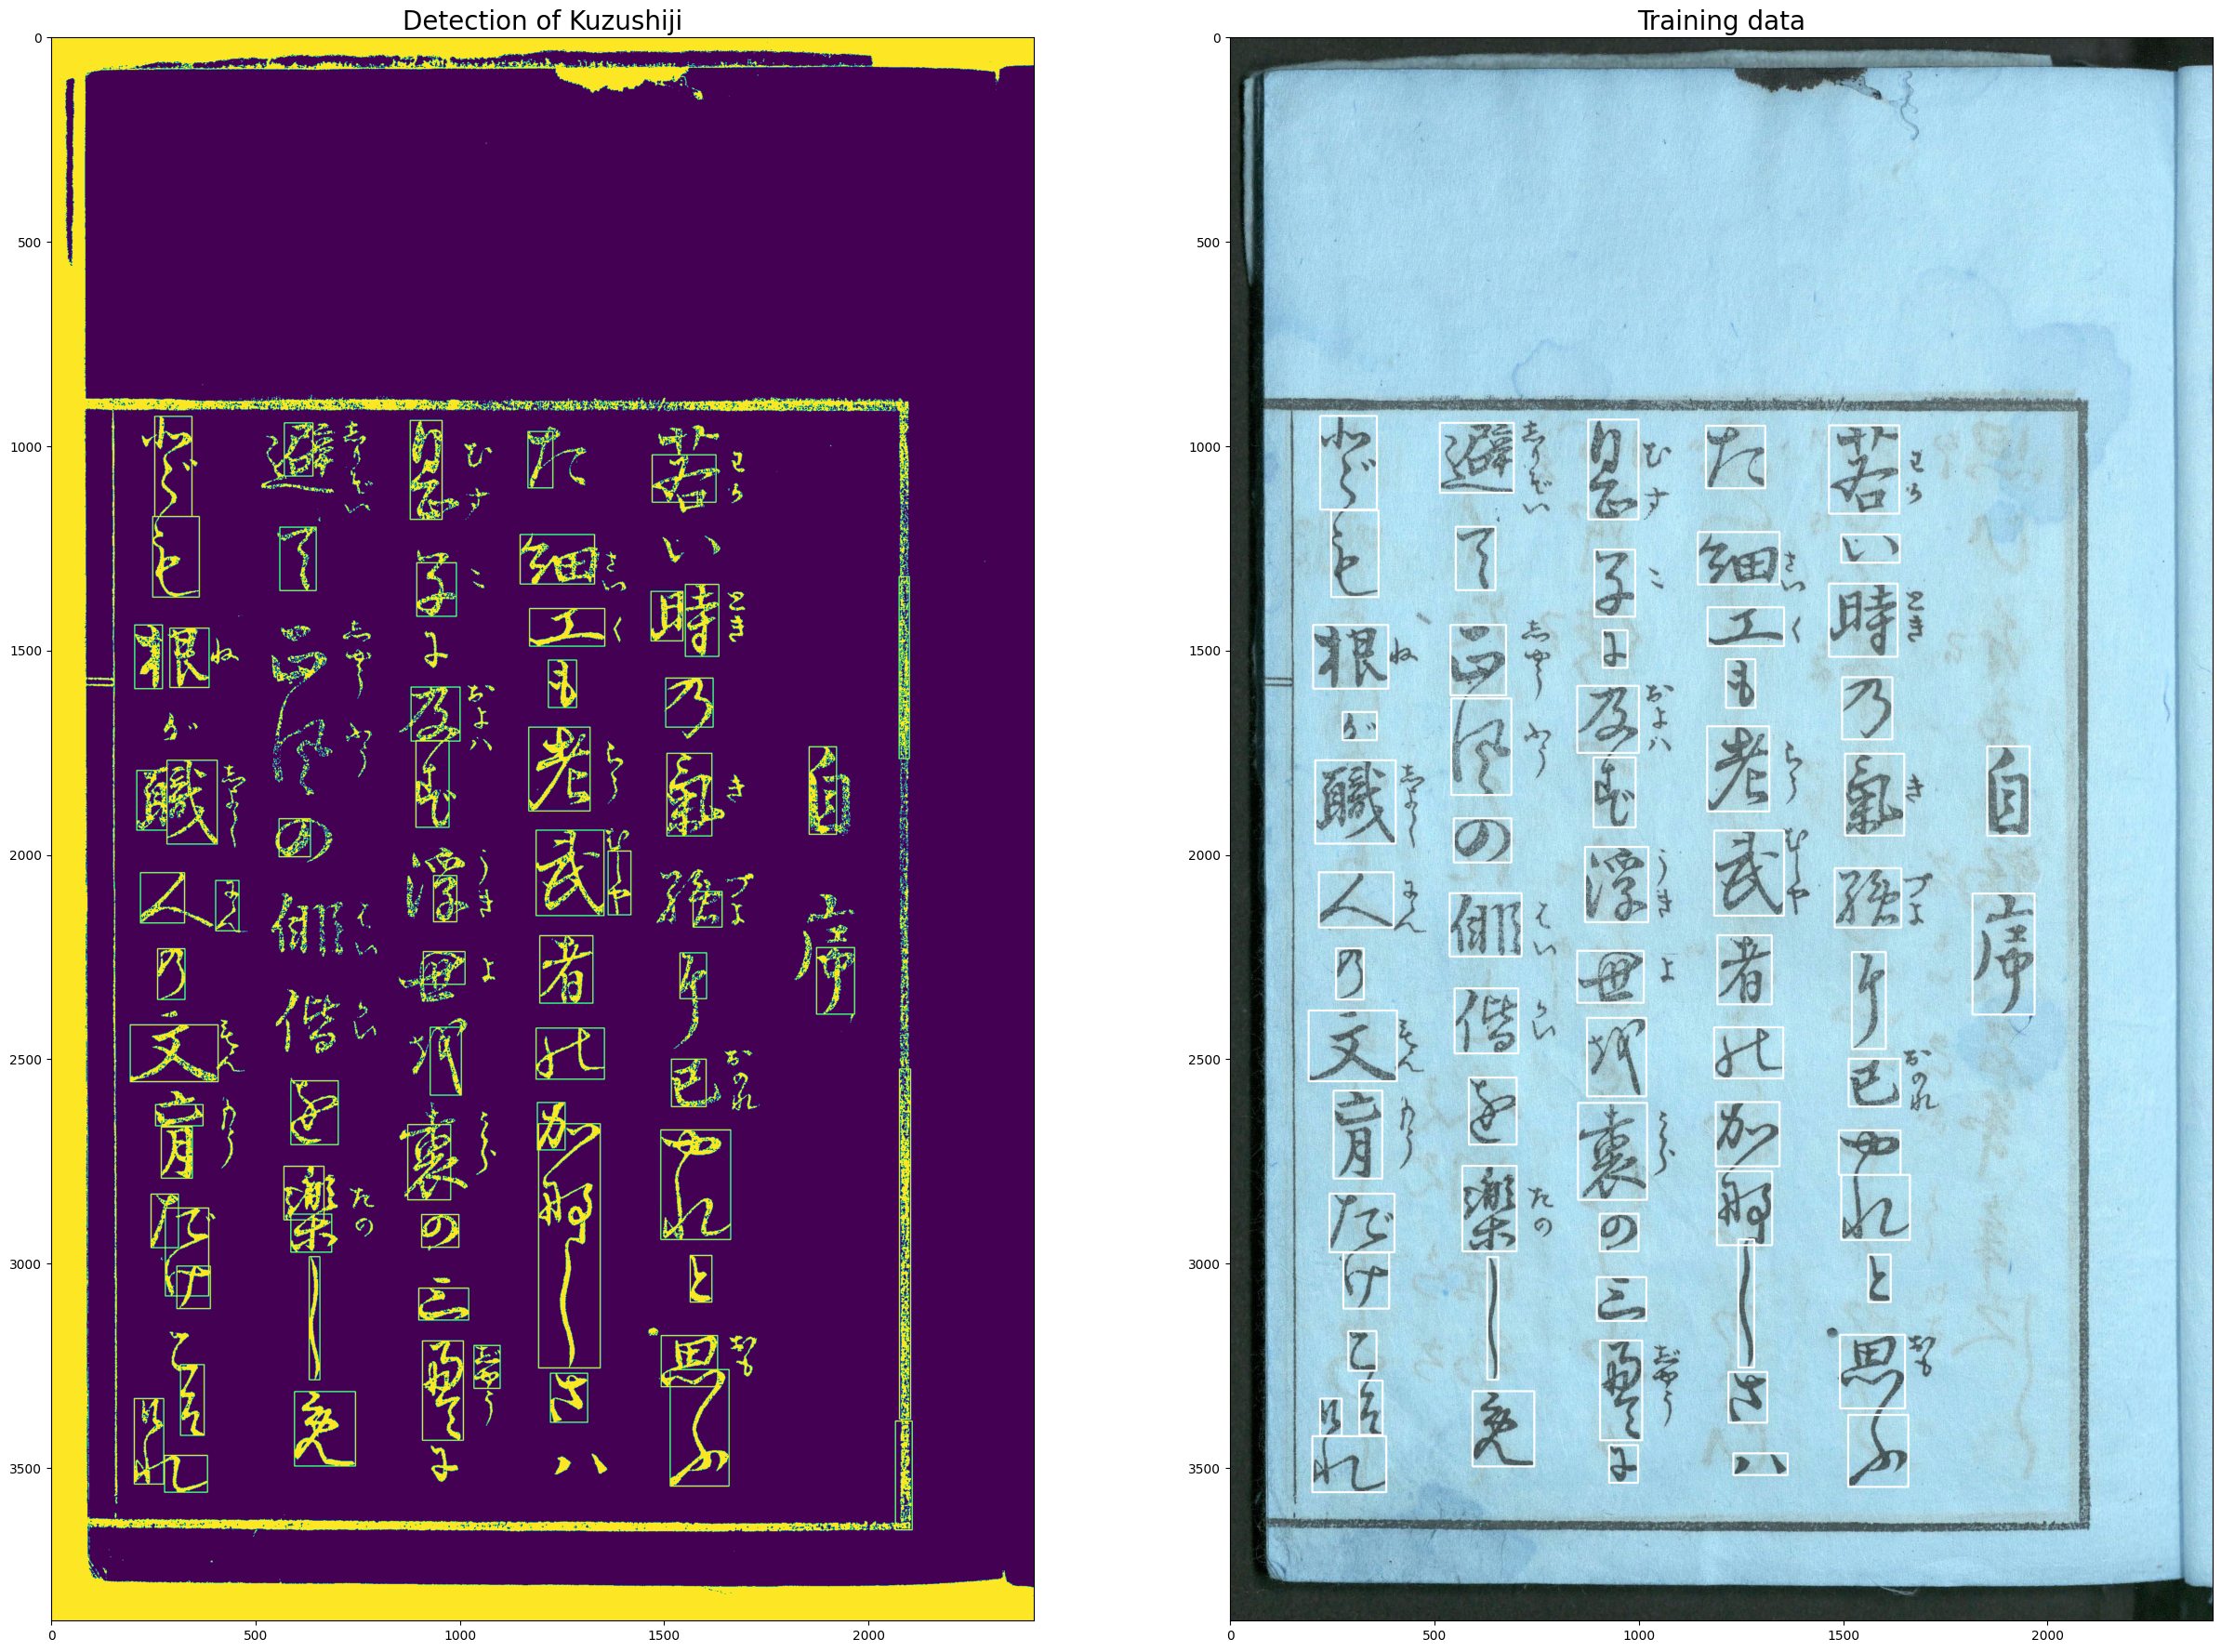

In [9]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Attempt 3

def VisualizeKuzushiji(imagePath):
    # Reading image & preparing to draw,
    img = cv2.imread(imagePath)
    imsource = Image.open(imagePath)
    char_draw = ImageDraw.Draw(imsource)

    # Preprocessing,
    im_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, im_th = cv2.threshold(im_grey, 130, 255, cv2.THRESH_BINARY_INV)
    ctrs, _ = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    ''',
    RETR_EXTERNAL b/c we only want the contours of the parent characters to make a bounding,
    box, we don't need a sub contour for each stroke inside of a character,
    CHAIN_APPROX_SIMPLE b/c we only need the bounding box,
    '''

    rects = [cv2.boundingRect(ctr) for ctr in ctrs]
    display_img = im_th
    max_width = []

    for rect in rects:
        x, y, w, h = rect
        # Characters for the most part should only take 1/6th of image,
        if h * w > 6000 and w < 500:
            display_img = cv2.rectangle(display_img, (x, y), (x+w, y+h), (255, 255, 255), 2)
            

   
    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1)
    plt.title("Detection of Kuzushiji",fontsize=20)
    plt.imshow(display_img)

    plt.subplot(1,2,2)
    plt.title("Training data",fontsize=20)
    plt.imshow(VisualizeTraining(imagePath))


    return char_draw

def VisualizeTraining(imagePath):
    '''
    Display the training image with the bounding box of the characters
    '''

    img = cv2.imread(imagePath)

    def chunks(lst, n):
        for i in range(0, len(lst), n):
            yield lst[i:i + n]

    data = "U+306F 1231 3465 133 53 U+304C 275 1652 84 69 U+3044 1495 1218 143 69 U+3051 220 3331 53 91 U+306B 911 1452 61 92 U+306B 927 3445 71 92 U+306E 904 2879 95 92 U+5DE5 1168 1396 187 95 U+3053 289 3166 69 97 U+4E09 897 3034 121 107 U+306E 547 1912 141 108 U+3084 1489 2675 151 109 U+3068 1561 2979 55 116 U+5DF1 1513 2500 127 117 U+3082 1213 1523 72 119 U+3055 1219 3266 95 124 U+306E 259 2230 68 125 U+306E 1184 2423 169 125 U+4E16 849 2236 163 127 U+7D30 1144 1212 200 128 U+305D 316 3287 57 133 U+4EBA 217 2044 183 135 U+3051 277 2974 112 137 U+308C 201 3423 181 137 U+3060 243 2830 159 143 U+5F37 1479 2034 163 145 U+306E 1497 1567 123 152 U+305F 1164 952 145 153 U+3066 552 1199 97 155 U+4FF3 537 2095 176 155 U+6839 203 1439 184 156 U+304B 1188 2606 156 157 U+8AE7 549 2328 156 159 U+308C 1495 2784 168 159 U+5B50 891 1255 100 164 U+3092 584 2546 117 164 U+53CA 849 1588 151 164 U+8005 1192 2198 133 169 U+305A 889 1763 103 171 U+907F 513 945 181 171 U+6B63 539 1439 136 172 U+6587 192 2382 216 173 U+3075 1512 3371 147 176 U+6642 1465 1338 168 179 U+601D 1492 3175 159 180 U+306A 1191 2775 135 181 U+3081 593 3313 151 184 U+6D6E 868 1982 155 184 U+3092 873 2400 145 192 U+6C17 1504 1754 145 200 U+8077 208 1770 197 204 U+8001 1167 1687 152 208 U+6B66 1184 1942 171 208 U+697D 568 2762 133 209 U+3082 247 1159 116 212 U+76F2 253 2578 119 215 U+82E5 1465 951 172 216 U+81EA 1852 1736 104 219 U+3069 220 928 139 229 U+98A8 541 1619 147 236 U+306B 1521 2239 83 237 U+88CF 851 2608 169 237 U+7573 905 3189 103 244 U+606F 876 937 123 244 U+5E8F 1816 2096 152 296 U+3057 629 2985 27 300 U+3057 1243 2942 39 313"
    results = data.split(" ")
    results = list(chunks(results, 5))

    for result in results:
        char, x, y, w, h = result
        x, y, w, h = int(x), int(y), int(w), int(h)
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,255,255), 3)

    return img

img1 = VisualizeTraining(DIR + "/100241706_00004_2.jpg")
img1 = VisualizeKuzushiji(DIR + "/100241706_00004_2.jpg")


# plt.subplot(1,4,2),
# plt.title(\"Recognition of Kuzushiji\",fontsize=20),
# plt.imshow(imsource1)

In [47]:
import pandas as pd

# Read in the unicode translation
unicode_map = {codepoint: char for codepoint, char in pd.read_csv(DIR + '/unicode_translation.csv').values}

# Read in the training data
data = pd.read_csv(DIR + '/train.csv')

# Check for null values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

# Disaply sample data
data.head()

image_id    0
labels      0
dtype: int64
0


image_id                                             labels
0  100241706_00004_2  U+306F 1231 3465 133 53 U+304C 275 1652 84 69 ...
1  100241706_00005_1  U+306F 1087 2018 103 65 U+304B 1456 1832 40 73...
2  100241706_00005_2  U+306F 572 1376 125 57 U+306E 1551 2080 69 68 ...
3  100241706_00006_1  U+3082 1455 3009 65 44 U+516B 1654 1528 141 75...
4  100241706_00007_2  U+309D 1201 2949 27 33 U+309D 1196 1539 27 36 ...

100%|██████████| 10/10 [00:01<00:00,  5.79it/s]
/home/harris/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 12365 (\N{HIRAGANA LETTER KI}) missing from current font.
  func(*args, **kwargs)
/home/harris/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from current font.
  func(*args, **kwargs)
/home/harris/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 25152 (\N{CJK UNIFIED IDEOGRAPH-6240}) missing from current font.
  func(*args, **kwargs)
/home/harris/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from current font.
  func(*args, **kwargs)
/home/harris/.local/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from current font.
  func(*args, **kwargs)
/home/harris/.local/lib/python3.10/site-pac

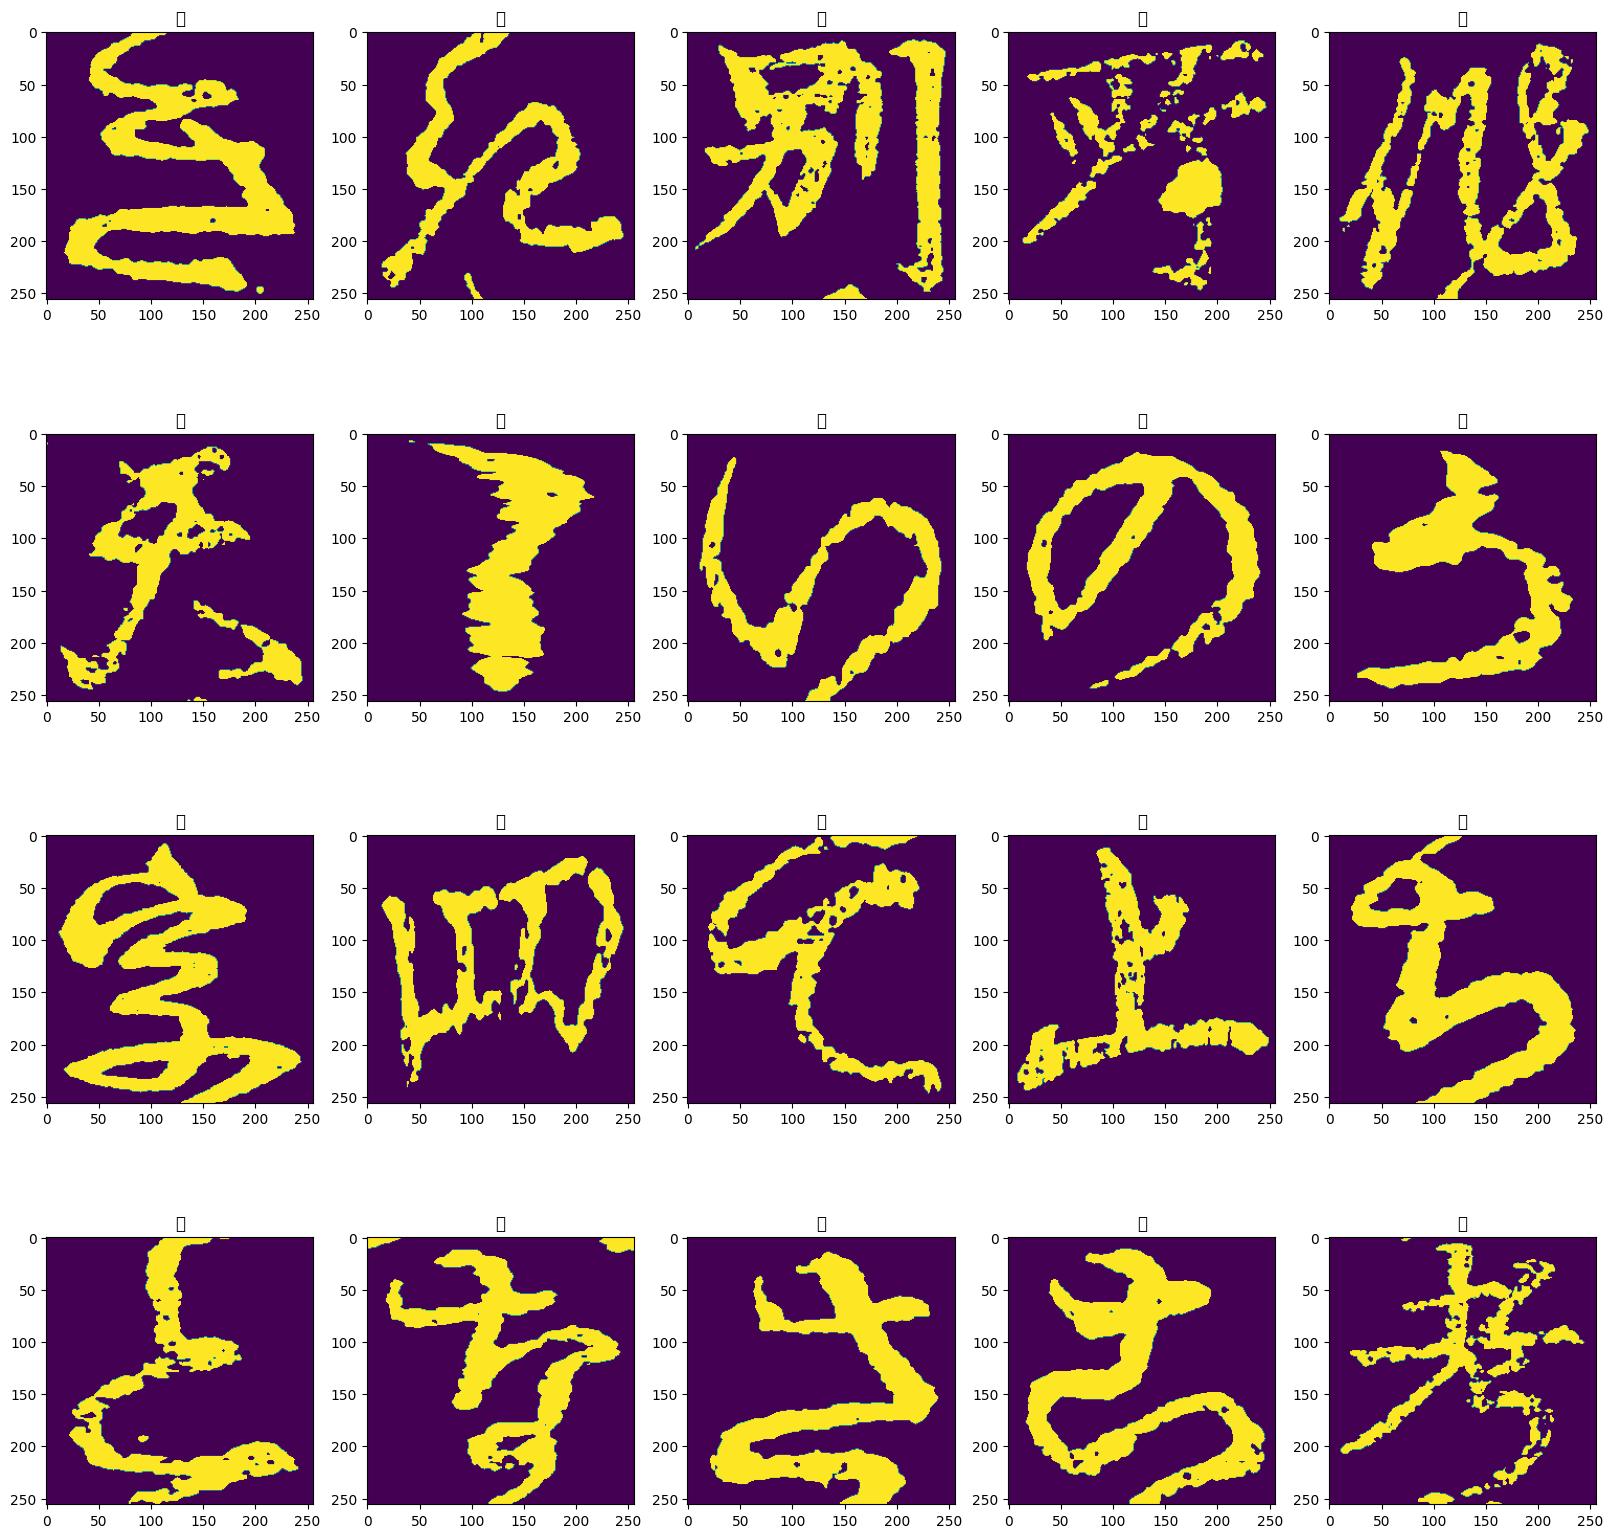

In [50]:
from tqdm import tqdm
import random as rand

def extract_data():
   '''
   Takes in training data, segments the characters, and returns a list of character bounding boxes with encoding 
   '''

   X = []
   Y = []   

   for image_encoding in tqdm(data[0:10].values):   
      try: 
         # Clean data to be individal images 
         seg_encoding = image_encoding[1].split(" ")
         seg_encoding = [seg_encoding[i:i+5] for i in range(0, len(seg_encoding), 5)]

         # Read in the image and convert to threshold
         img = Image.open(DIR + "/train_images/" + image_encoding[0] + ".jpg").convert("RGBA")
   
         for char, x, y, w, h in seg_encoding:
            
            # Threshold each character and get encoding
            x,y,w,h = int(x), int(y), int(w), int(h)
            char = unicode_map[char]
            cropped_img = img.crop((x-5, y-5, x+w+5, y+h+5))
            resized_img = cropped_img.resize((256, 256))
            resized_img = np.array(resized_img)
            ret, im_th = cv2.threshold(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY), 130, 255, cv2.THRESH_BINARY_INV)
            
            # Append to X and Y
            try:
               X.append(im_th)
            except Exception as E:
               print(E)
               print(f"{[char, x, y, w, h]} with image encoding {image_encoding[0]} failed to append to X")
               pass

            try:    
               Y.append(char)
            except Exception as E:
               print(E)
               X.pop()
               print(f"{[char, x, y, w, h]} with image encoding {image_encoding[0]} failed to append to Y")
               pass

      except Exception as E:
         print(E)

   return X, Y


def display_sample(X, Y,  num_samples=20):
   '''
   Takes a random subsample of characters and displays them
   '''

   if num_samples > 200:
      print("Please enter a number less than 200")
      return
   
   indicies = rand.sample(range(0, len(X)), num_samples)
   X_samples = [X[i] for i in indicies]   
   Y_samples = [Y[i] for i in indicies]
   plt.figure(figsize=(20,20))

   for i, sample in enumerate(range(num_samples)):
      plt.subplot(4, 5, i+1)
      plt.title(Y_samples[i])
      plt.imshow(X_samples[i])


X_train, Y_train = extract_data()
display_sample(X_train, Y_train)


In [ ]:
   # def collect_training(dataPath, trainImagePath):
   #    imageNames = os.listdir(os.path.join(DIR + trainImagePath))
   #    df = pd.read_csv(os.path.join(DIR + dataPath))
      
   #    # Check if there is a directory called \"training_images\" if there is, empty it otherwise make one,
   #    training_dir = os.path.join(DIR + "/segmented_training_images")
   #    if os.path.exists(training_dir):
   #       for filename in os.listdir(training_dir):
   #          file_path = os.path.join(training_dir, filename)
   #          try:
   #             os.remove(file_path)
   #          except Exception as e:
   #             print('Failed to delete %s. Reason: %s' % (file_path, e))
   #          else:
   #             os.makedirs(training_dir)

   #          print(imageNames)
   #          print(df.head())
   #          for ID in df['image_id']:
   #             print(DIR + trainImagePath + ID)
   #             img = cv2.imread(DIR + trainImagePath + ID + ".jpg")
   #             chars = df[df['image_id'] == ID]['labels'].tolist()[0].split(" ")
   #             rects = [chars[i:i+5] for i in range(0, len(chars), 5)]

   #             for i, rect in enumerate(rects):
   #                # Save a file for each character
   #                char, x, y, w, h = rect
   #                char_img = img[int(y):int(y)+int(h), int(x):int(x)+int(w)]
   #                cv2.imwrite(os.path.join(training_dir + " ", f"{ID}_{i}_{char}.jpg"), char_img)
                              
   #    # FILEPATH: /home/harris/Projects/AI-Stuff/AI-foundations/Competitions/Kuzushiji-Recognition-Comp/clean-data.ipynb
   #    collect_training("train.csv", "train_images")


In [51]:
from sklearn.model_selection import train_test_split

# Segmenting data to lower training cost
SEGMENT_DATA = 50000
indicies = rand.sample(range(0, len(X_train)), SEGMENT_DATA)

X_train = [X_train[i] for i in indicies]
Y_train = [Y_train[i] for i in indicies]

# Splitting training, validation and test data
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
# Creating model
import tensorflow as tf

model = tf.keras.models.Sequential()
